In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from matplotlib import cm

In [7]:
bt = pd.read_csv('data_bottom.csv',sep=',',encoding='cp949') #pandas 의 DataFrame으로 데이터를 읽어옵니다
bt.head()

,idx,brand,name,category,price,likes,size,len,wst,thi,rise,ank,img_url
0,0,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,28/28,98.0,36.0,26.0,23.0,15.0,https://image.musinsa.com/images/prd_img/20121...
1,1,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,28/30,101.0,36.0,26.0,23.0,15.0,https://image.musinsa.com/images/prd_img/20121...
2,2,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,28/32,104.0,36.0,26.0,23.0,15.0,https://image.musinsa.com/images/prd_img/20121...
3,3,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,29/28,99.0,37.0,26.5,23.5,15.5,https://image.musinsa.com/images/prd_img/20121...
4,4,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,29/30,102.0,37.0,26.5,23.5,15.5,https://image.musinsa.com/images/prd_img/20121...


In [6]:
#bottom.columns = pd.Index(['brand', 'name', 'category', 'price', 'likes', 'size', 'len', 'wst', 'thi', 'rise', 'ank', 'img_url'],dtype='object')

In [4]:
bt[bt.idx==60]

,idx,brand,name,category,price,likes,size,len,wst,thi,rise,ank,img_url
42237,60,MODIFIED,M0447 wakefield press coating jeans,데님 팬츠,69000,2997,S,NaN,NaN,NaN,NaN,NaN,https://image.musinsa.com/images/goods_img/201...


In [8]:
bt.count() # 총 42919개의 데이터

idx         42919
brand       42919
name        42915
category    42919
price       42919
likes       42919
size        40166
len         36107
wst         35697
thi         34245
rise        33498
ank         34031
img_url     42919
dtype: int64

In [9]:
btC = bt.dropna(how='any')
btC.count() #결측치 제거 후 29925개가 남았습니다

idx         29925
brand       29925
name        29925
category    29925
price       29925
likes       29925
size        29925
len         29925
wst         29925
thi         29925
rise        29925
ank         29925
img_url     29925
dtype: int64

## __fit guides__
#### 세부사이즈에 따라 제품의 shape을 나눌 수 있고 이를 fit이라 부를 수 있습니다
![fits](https://www.blitzresults.com/wp-content/uploads/50.jpg)

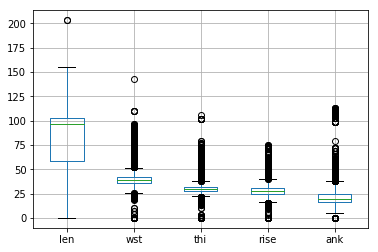

In [11]:
btC.iloc[:,7:].boxplot() #fit의 도출을 위한 세부사이즈 변수 총장, 허리, 허벅지, 밑위, 밑단 변수

In [13]:
btC.iloc[:,1:].describe()

,price,likes,len,wst,thi,rise,ank
count,29925.000000,29925.000000,29925.000000,29925.000000,29925.000000,29925.000000,29925.000000
mean,76267.016541,55.820652,86.154750,38.954446,30.257474,28.252521,20.927662
std,44438.055410,287.922981,24.303141,7.786692,5.232100,4.968102,7.206144
min,9900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49000.000000,3.000000,58.000000,35.500000,28.000000,25.000000,16.500000
50%,65000.000000,8.000000,96.500000,39.000000,30.000000,28.000000,19.000000
75%,87000.000000,23.000000,103.000000,42.000000,32.000000,31.000000,25.000000
max,455000.000000,6199.000000,203.000000,142.500000,105.200000,74.500000,113.000000


In [16]:
#short = btC[btC.category=='쇼트 팬츠'] #쇼트팬츠의 경우는 분석에서 제외합니다
noShort = btC[btC.category!='쇼트 팬츠']
len(noShort) #쇼트팬츠 제외 결과 22620개의 데이터가 남았습니다

22620

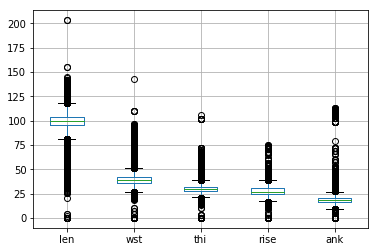

In [15]:
noShort.iloc[:,7:].boxplot()

In [17]:
noShort_conditioned = noShort[(70<noShort.len) & (noShort.len<140) & (20<noShort.wst)&(noShort.wst<110) & (15<noShort.thi)&(noShort.thi<80) & (10<noShort.rise)&(noShort.rise<50)& (10<noShort.ank)&(noShort.ank<60)]
len(noShort_conditioned)

21418

In [18]:
print(noShort_conditioned.wst.quantile(0.98))
print(noShort_conditioned.thi.quantile(0.98))
print(noShort_conditioned.ank.quantile(0.98))

54.0
38.0
29.0


In [19]:
w = noShort_conditioned.wst
noShort_conditioned.wst = np.where(w>54,w/2,w)
t = noShort_conditioned.thi
noShort_conditioned.thi = np.where(t>38,t/2,t)
a = noShort_conditioned.ank
noShort_conditioned.ank = np.where(a>29,a/2,a)

C:\Users\Chankoo\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


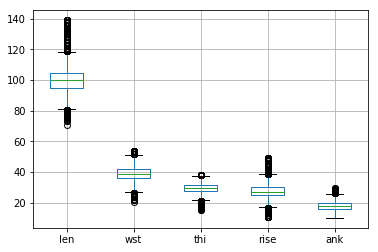

In [20]:
noShort_conditioned.iloc[:,7:].boxplot() #이상치 제거

In [21]:
bottoms = noShort_conditioned
for i in range(7,12):
    bottoms.iloc[:,i] = (bottoms.iloc[:,i]-bottoms.iloc[:,i].min())/(bottoms.iloc[:,i].max()-bottoms.iloc[:,i].min())

C:\Users\Chankoo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
bottoms.iloc[:,7:].describe()

,len,wst,thi,rise,ank
count,21418.000000,21418.000000,21418.000000,21418.000000,21418.000000
mean,0.428595,0.546752,0.618102,0.445349,0.410940
std,0.103996,0.123876,0.143592,0.109531,0.170040
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.357664,0.462687,0.533333,0.368421,0.300254
50%,0.430657,0.552239,0.622222,0.421053,0.402036
75%,0.496350,0.641791,0.711111,0.513158,0.503817
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
denim= bottoms[bottoms.category=='데님 팬츠']
training= bottoms[bottoms.category=='트레이닝/조거 팬츠']
cotton = bottoms[bottoms.category=='코튼 팬츠']
slacks = bottoms[bottoms.category=='수트 팬츠/슬랙스'] # 카테고리별로 분류

categorys = [denim, training, cotton, slacks]

In [27]:
denim

,idx,brand,name,category,price,likes,size,len,wst,thi,rise,ank,img_url
0,0,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,28/28,0.401460,0.462687,0.466667,0.315789,0.249364,https://image.musinsa.com/images/prd_img/20121...
1,1,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,28/30,0.445255,0.462687,0.466667,0.315789,0.249364,https://image.musinsa.com/images/prd_img/20121...
2,2,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,28/32,0.489051,0.462687,0.466667,0.315789,0.249364,https://image.musinsa.com/images/prd_img/20121...
3,3,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,29/28,0.416058,0.492537,0.488889,0.328947,0.274809,https://image.musinsa.com/images/prd_img/20121...
4,4,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,29/30,0.459854,0.492537,0.488889,0.328947,0.274809,https://image.musinsa.com/images/prd_img/20121...
5,5,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,29/32,0.503650,0.492537,0.488889,0.328947,0.274809,https://image.musinsa.com/images/prd_img/20121...
6,6,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,30/28,0.430657,0.522388,0.511111,0.342105,0.300254,https://image.musinsa.com/images/prd_img/20121...
7,7,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,30/30,0.474453,0.522388,0.511111,0.342105,0.300254,https://image.musinsa.com/images/prd_img/20121...
8,8,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,30/32,0.518248,0.522388,0.511111,0.342105,0.300254,https://image.musinsa.com/images/prd_img/20121...
9,9,MODIFIED,M0096 12.5OZ RIGID DENIM,데님 팬츠,59000,3676,31/28,0.445255,0.552239,0.533333,0.355263,0.325700,https://image.musinsa.com/images/prd_img/20121...


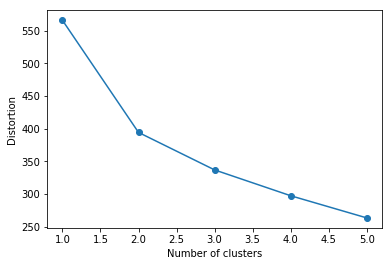

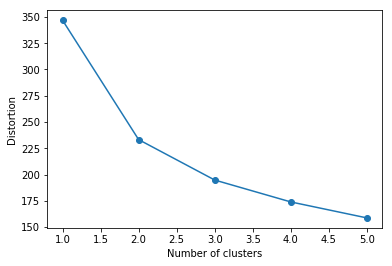

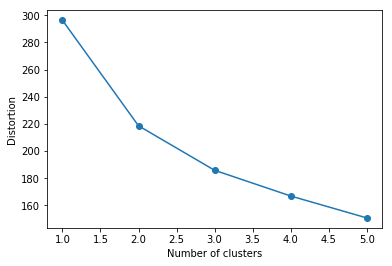

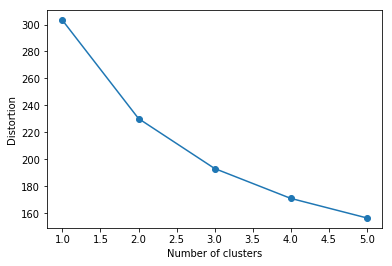

In [31]:
for i in range(4): #카테고리별로 elbow method를 적용해 적절한 클러스터의 개수를 도출합니다
    distortions = []
    plt.figure(i+1)
    for k in range(1,6):
        km = KMeans(n_clusters = k,
               init='k-means++',
               n_init = 100,
               max_iter = 200,
               random_state=0)
        km.fit(categorys[i].iloc[:,7:12])
        distortions.append(km.inertia_)
    plt.plot(range(1,6), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [70]:
for i in range(4): # 다른 방법으로 실루엣 스코어에 기반하여 적절한 클러스터 개수를 도출합니다
    print(categorys[i].category.iloc[0])
    for k in range(2,8):
        km = KMeans(n_clusters = k,
               init='k-means++',
               n_init = 100,
               max_iter = 200,
               random_state=0).fit(categorys[i].iloc[:,7:12])
        print("score for %d clusters:%.3f" % (k,silhouette_score(categorys[i].iloc[:,7:12], km.labels_)))
        

데님 팬츠
score for 2 clusters:0.265
score for 3 clusters:0.213
score for 4 clusters:0.194
score for 5 clusters:0.206
score for 6 clusters:0.199
score for 7 clusters:0.204
트레이닝/조거 팬츠
score for 2 clusters:0.303
score for 3 clusters:0.234
score for 4 clusters:0.207
score for 5 clusters:0.199
score for 6 clusters:0.189
score for 7 clusters:0.192
코튼 팬츠
score for 2 clusters:0.240
score for 3 clusters:0.226
score for 4 clusters:0.203
score for 5 clusters:0.218
score for 6 clusters:0.187
score for 7 clusters:0.193
수트 팬츠/슬랙스
score for 2 clusters:0.259
score for 3 clusters:0.198
score for 4 clusters:0.196
score for 5 clusters:0.199
score for 6 clusters:0.197
score for 7 clusters:0.195


In [34]:
#개중 적절하다고 판단되는 클러스터 수로 모델을 생성합니다
km_denim = KMeans(n_clusters=5)
model_denim = km_denim.fit(denim.iloc[:,7:12])
km_training = KMeans(n_clusters=2)
model_training = km_training.fit(training.iloc[:,7:12])
km_cotton = KMeans(n_clusters=5)
model_cotton = km_cotton.fit(cotton.iloc[:,7:12])
km_slacks = KMeans(n_clusters=2)
model_slacks = km_slacks.fit(slacks.iloc[:,7:12])


In [72]:
print(model_denim)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [35]:
y_denim = model_denim.predict(denim.iloc[:,7:12]) #클러스터의 값을 라벨링합니다
y_training = model_training.predict(training.iloc[:,7:12])
y_cotton = model_cotton.predict(cotton.iloc[:,7:12])
y_slacks = model_slacks.predict(slacks.iloc[:,7:12]) 

In [36]:
def plotSilhouette(X, y_km): #실루엣 스코어의 시각화
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks=[]
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('clusters')
    plt.xlabel('coefficient silhouette')
    plt.show()

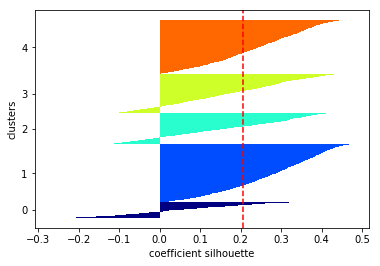

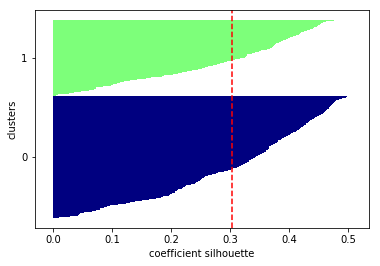

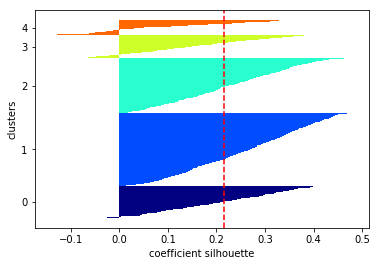

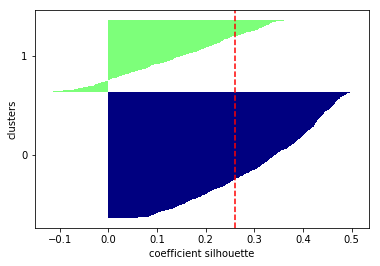

In [37]:
plt.figure(1)
plotSilhouette(denim.iloc[:,7:12],y_denim)
plt.figure(2)
plotSilhouette(training.iloc[:,7:12],y_training)
plt.figure(3)
plotSilhouette(cotton.iloc[:,7:12],y_cotton)
plt.figure(4)
plotSilhouette(slacks.iloc[:,7:12],y_slacks)

In [38]:
models = [model_denim, model_training, model_cotton, model_slacks]
for i in range(4):
    labels = models[i].labels_
    print('\nFor',categorys[i].iloc[0].category)
    for k in range(models[i].n_clusters):
        print("The number of cluster",k,sum(labels==k))



For 데님 팬츠
The number of cluster 0 770
The number of cluster 1 2857
The number of cluster 2 1538
The number of cluster 3 1916
The number of cluster 4 2671

For 트레이닝/조거 팬츠
The number of cluster 0 2244
The number of cluster 1 1382

For 코튼 팬츠
The number of cluster 0 589
The number of cluster 1 1342
The number of cluster 2 999
The number of cluster 3 429
The number of cluster 4 274

For 수트 팬츠/슬랙스
The number of cluster 0 2515
The number of cluster 1 1423


In [40]:
for i in range(4):
    print('\nFor',categorys[i].iloc[0].category)
    print(models[i].cluster_centers_) #정규화된 클러스터 벡터를 출력


For 데님 팬츠
[[0.35861977 0.44891064 0.52404329 0.44687286 0.5431116 ]
 [0.36750098 0.60646609 0.5878436  0.38934916 0.34425974]
 [0.38871698 0.46088834 0.38701055 0.32600096 0.23531601]
 [0.4921408  0.67431667 0.70453728 0.46707297 0.49329985]
 [0.53269833 0.57995114 0.54603554 0.36946247 0.33517232]]

For 트레이닝/조거 팬츠
[[0.42625395 0.44660454 0.6509487  0.51611901 0.18911613]
 [0.45053186 0.45770568 0.67224473 0.52774583 0.55170623]]

For 코튼 팬츠
[[0.36949426 0.38215797 0.65280513 0.48227147 0.42792156]
 [0.45115146 0.64629312 0.77513496 0.51809554 0.56286808]
 [0.43544566 0.58492373 0.61482371 0.41360044 0.37063017]
 [0.42117979 0.44532582 0.80104636 0.60041099 0.743999  ]
 [0.41254196 0.47110796 0.44296837 0.47877449 0.644741  ]]

For 수트 팬츠/슬랙스
[[0.36992236 0.57341563 0.62336558 0.41651041 0.39354003]
 [0.42655129 0.54249064 0.69818381 0.51534749 0.63986775]]


# Fit Guide
### 도출된 클러스터에 대한 해석
데님 팬츠 -> 
0: 레귤러,
1: 테이퍼드
2: 스키니,
3: 루즈,
4: 슬림

트레이닝/조거 팬츠 -> 
0: 조거,
1: 트레이닝

코튼 팬츠 -> 
0: 슬림,
1: 세미 와이드,
2: 테이퍼드,
3: 와이드,
4: 레귤러

수트 팬츠/슬랙스 -> 
0: 테이퍼드,
1: 레귤러

In [51]:
denim['fit'] = y_denim
training['fit'] = y_training
cotton['fit'] = y_cotton
slacks['fit'] = y_slacks

final = pd.concat([denim,training,cotton,slacks])

C:\Users\Chankoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Chankoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chankoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [58]:
pivot = pd.pivot_table(final,index=['category','fit'],values=['price','likes']) #피봇테이블을 이용해 카테고리별 fit의 평균치를 도출합니다
pivot

likes          price
category   fit                           
데님 팬츠      0     20.080519   78943.636364
           1    110.409870   76556.415821
           2    100.707412   97529.811443
           3     69.966075   97810.093946
           4    107.089105  115932.909023
수트 팬츠/슬랙스  0     56.962227   72860.000000
           1     60.780042   78316.444132
코튼 팬츠      0    101.414261   64864.346350
           1     55.617735   71129.433681
           2     69.435435   75528.528529
           3     18.144522   78394.638695
           4     10.981752   87273.722628
트레이닝/조거 팬츠 0     33.654635   71605.926916
           1     41.659190   68619.898698

In [118]:
plt.rcParams['font.family'] = 'NanumSquare'

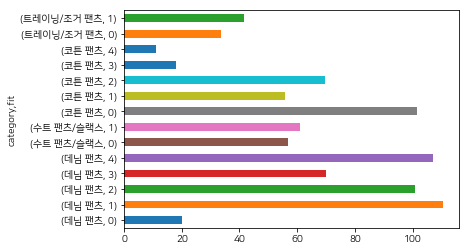

In [71]:
pivot['likes'].plot(kind='barh')

In [115]:
pivot2 = pd.pivot_table(final,index=['brand'],values=['price','likes'])
pivot2.sort_values('price').head(10) #저가 브랜드 top 10

,likes,price
brand,,
PAZZ,32.000000,21500.000000
FRANKENMONO,10.750000,25937.500000
BRENSON,27.684211,29068.421053
WOONG,4.000000,29500.000000
ILKEUNN,24.000000,29900.000000
MUSINSA STANDARD,871.245283,29900.000000
AMADE,1.500000,31000.000000
MELANGE MASTER,191.545455,32900.000000
MSUL,1.000000,32900.000000


In [116]:
pivot2.sort_values('likes',ascending=False).head(10) #인기있는 브랜드 top10

,likes,price
brand,,
SOVERMENT WITH LOMORT,2107.857143,66857.142857
ADLE,913.666667,38000.000000
MUSINSA STANDARD,871.245283,29900.000000
UNIIS DESIGN,672.500000,72000.000000
ACOVER,582.856250,36547.937500
NOT4NERD,562.000000,89000.000000
MODIFIED,461.787088,63902.472527
RUGGED HOUSE,452.439024,38317.073171
PIECE WORKER,387.226107,85289.044289


In [117]:
denim_ctab = pd.crosstab(denim.brand,denim.fit)
denim_ctab.sort_values(by=1,ascending=False).head(10) #테이퍼드 핏(==1) denim 생산 top10 

fit,0,1,2,3,4
brand,,,,,
UNTOUCHED,0,262,5,19,102
NIGER,0,239,20,25,0
PIECE WORKER,40,173,45,100,50
MODIFIED,3,148,140,39,250
FATALISM,4,146,37,28,9
D-CLIP,0,120,15,58,73
86ROAD,0,113,34,36,12
LAB101,0,59,0,40,83
STRIKE,0,49,20,4,4
